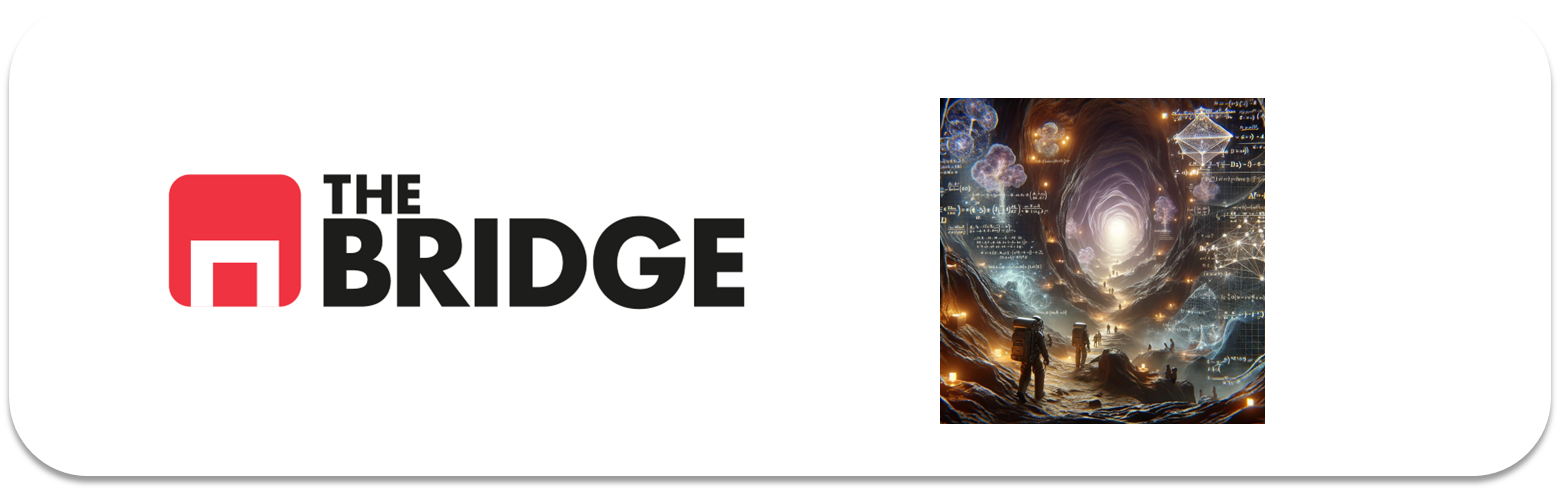

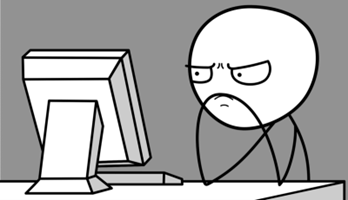

Para ejercitarte y afianzar lo aprendido sobre nuestra **Introducción a Deep Learning**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

**EN PROCESO DE CARGA**

# Bank marketing dataset - Depósito a plazo fijo

En este notebook vamos repasar un modelo que ya hicimos en anteriores ocasiones que nos permitía predecir si un individuo dependiendo de sus características, así como características de la campaña de marketing a la cual se pretende asignarlo, va a adquirir un servicio bancario (en este caso, un depósito a plazo fijo). El objetivo de este ejercicio será, mas allá de obtener un modelo preciso o hacer un análisis de datos exhaustivo, observar las posibles diferencias entre el utilizar un modelo de regresión logística o uno de MLP (multi-layer perceptron) para predecir nuestra variable categórica (sí adquiere, no adquiere).

Obtenemos los datos a partir del "*UCI Machine Learning repository*".

### *Features*:

#### Datos del cliente:

1. **age** (edad)
2. **job** (tipo de trabajo)
3. **marital** (estado marital)
4. **education** (nivel de eduación)
5. **default** (fallo en pagar una deuda)
6. **housing** (si tiene un préstamo de vivienda)
7. **loan** (si tiene un préstamo personal)
8. **balance** (balance personal)

#### Datos del último contacto de la campaña de marketing en curso:

9. **contact** (tipo de contacto)
10. **month** (último mes de contacto)
11. **day** (último día de contacto)
12. **duration** (duración de la llamada en segundos; duration = 0 significa no contactados)

#### Otros

13. **campaign** (número de contactos al cliente hechos en esta campaña)
14. **pdays** (número de días que han pasado desde que el cliente fue contactado en una campaña anterior; 999 o -1 significa que el cliente no ha sido contactado)
15. **previous** (número de contactos realizados antes de esta campaña a el cliente)
16. **poutcome** (resultado de la campaña anterior)
17. **deposit** (target)

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [97]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn. metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


### Ejercicios 1

Importa los datos y echa un vistazo rápido. Selecciona la variable target y asignala a una variable "target".

In [79]:
df = pd.read_csv("./data/bank.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [81]:
target = "deposit"

In [82]:
def mapping(x):
    if x == 'yes':
        return 1
    else:
        return 0

df['deposit'] = df['deposit'].apply(mapping)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,0
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,0
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,0
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,0


In [83]:
def data_report(df):
    # Sacamos los NOMBRES
    cols = pd.DataFrame(df.columns.values, columns=["COL_N"])

    # Sacamos los TIPOS
    types = pd.DataFrame(df.dtypes.values, columns=["DATA_TYPE"])

    # Sacamos los MISSINGS
    percent_missing = round(df.isnull().sum() * 100 / len(df), 2)
    percent_missing_df = pd.DataFrame(percent_missing.values, columns=["MISSINGS (%)"])

    # Sacamos los VALORES UNICOS
    unicos = pd.DataFrame(df.nunique().values, columns=["UNIQUE_VALUES"])
    
    percent_cardin = round(unicos['UNIQUE_VALUES']*100/len(df), 2)
    percent_cardin_df = pd.DataFrame(percent_cardin.values, columns=["CARDIN (%)"])

    concatenado = pd.concat([cols, types, percent_missing_df, unicos, percent_cardin_df], axis=1, sort=False)
    concatenado.set_index('COL_N', drop=True, inplace=True)


    return concatenado.T
        
data_report(df)

COL_N,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
DATA_TYPE,int64,object,object,object,object,int64,object,object,object,int64,object,int64,int64,int64,int64,object,int64
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,76,12,3,4,2,3805,2,2,3,31,12,1428,36,472,34,4,2
CARDIN (%),0.68,0.11,0.03,0.04,0.02,34.09,0.02,0.02,0.03,0.28,0.11,12.79,0.32,4.23,0.3,0.04,0.02


### Ejercicio 2

Haz el split en train y test y analiza el target.

In [84]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
X_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
3955,28,student,single,tertiary,no,5741,no,no,cellular,10,sep,1042,5,200,3,failure
11150,34,management,married,secondary,no,355,no,no,cellular,21,aug,314,3,-1,0,unknown
5173,48,unemployed,divorced,secondary,no,201,no,no,cellular,10,nov,594,1,91,1,success
3017,53,entrepreneur,married,tertiary,no,1961,no,no,cellular,15,dec,351,1,-1,0,unknown
2910,53,management,married,tertiary,no,1624,no,no,cellular,11,nov,166,3,97,7,success
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,47,management,married,tertiary,no,761,yes,no,cellular,11,jul,80,2,-1,0,unknown
5191,28,self-employed,single,tertiary,no,159,no,no,cellular,16,nov,449,2,33,4,success
5390,35,technician,married,secondary,no,1144,no,no,cellular,20,aug,197,13,-1,0,unknown
860,51,retired,married,tertiary,no,746,no,no,cellular,25,aug,372,5,-1,0,unknown


In [86]:
y_train

3955     1
11150    0
5173     1
3017     1
2910     1
        ..
5734     0
5191     1
5390     0
860      1
7270     0
Name: deposit, Length: 8929, dtype: int64

In [87]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8929, 16)
(2233, 16)
(8929,)
(2233,)


In [88]:
df.deposit.value_counts(True)

deposit
0    0.52616
1    0.47384
Name: proportion, dtype: float64

### Ejercicio 3

Tienes múltiples variables tipo object y algunas numéricas, en este caso quédate solo con las variables numéricas y el target. Observa las distribuciones de dichas variables numéricas

In [89]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8929 entries, 3955 to 7270
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        8929 non-null   int64 
 1   job        8929 non-null   object
 2   marital    8929 non-null   object
 3   education  8929 non-null   object
 4   default    8929 non-null   object
 5   balance    8929 non-null   int64 
 6   housing    8929 non-null   object
 7   loan       8929 non-null   object
 8   contact    8929 non-null   object
 9   day        8929 non-null   int64 
 10  month      8929 non-null   object
 11  duration   8929 non-null   int64 
 12  campaign   8929 non-null   int64 
 13  pdays      8929 non-null   int64 
 14  previous   8929 non-null   int64 
 15  poutcome   8929 non-null   object
dtypes: int64(7), object(9)
memory usage: 1.2+ MB


In [90]:
features_num = X_train.select_dtypes(include=[np.number]).columns.to_list()

In [72]:
features_num

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [91]:
X_train = X_train[features_num]
X_test = X_test[features_num]

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'balance'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>,
        <Axes: title={'center': 'pdays'}>],
       [<Axes: title={'center': 'previous'}>, <Axes: >, <Axes: >]],
      dtype=object)

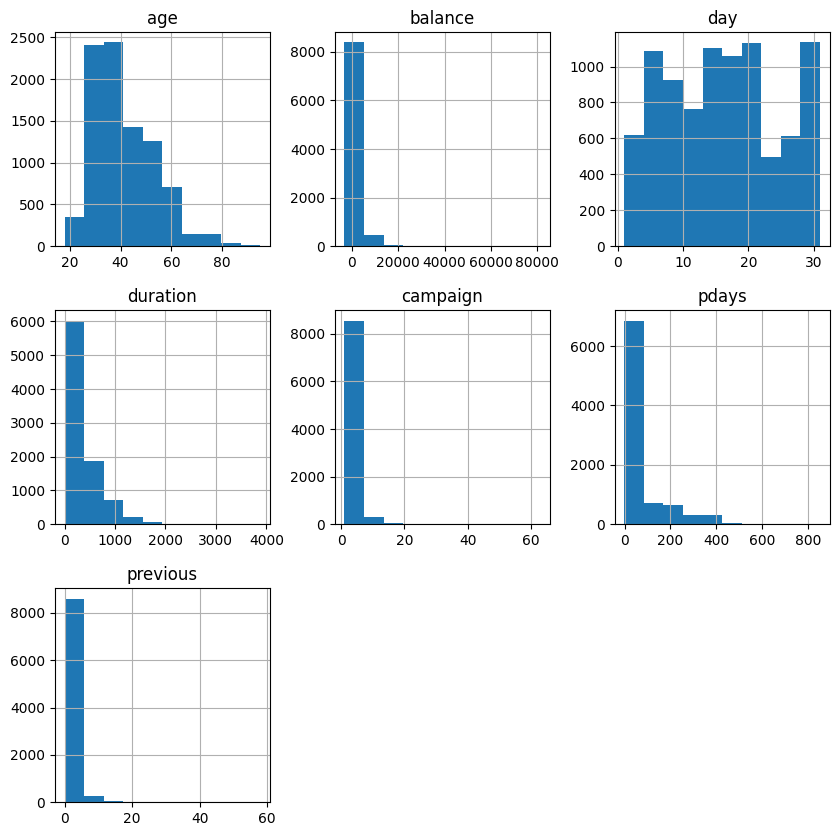

In [92]:
X_train[features_num].hist(figsize=(10, 10))

### Ejercicio 4

A partir de las features del ejercicio 3, realiza una selección de features sencilla, utiliza la técnica que consideres conveniente y quedate con 4 features.

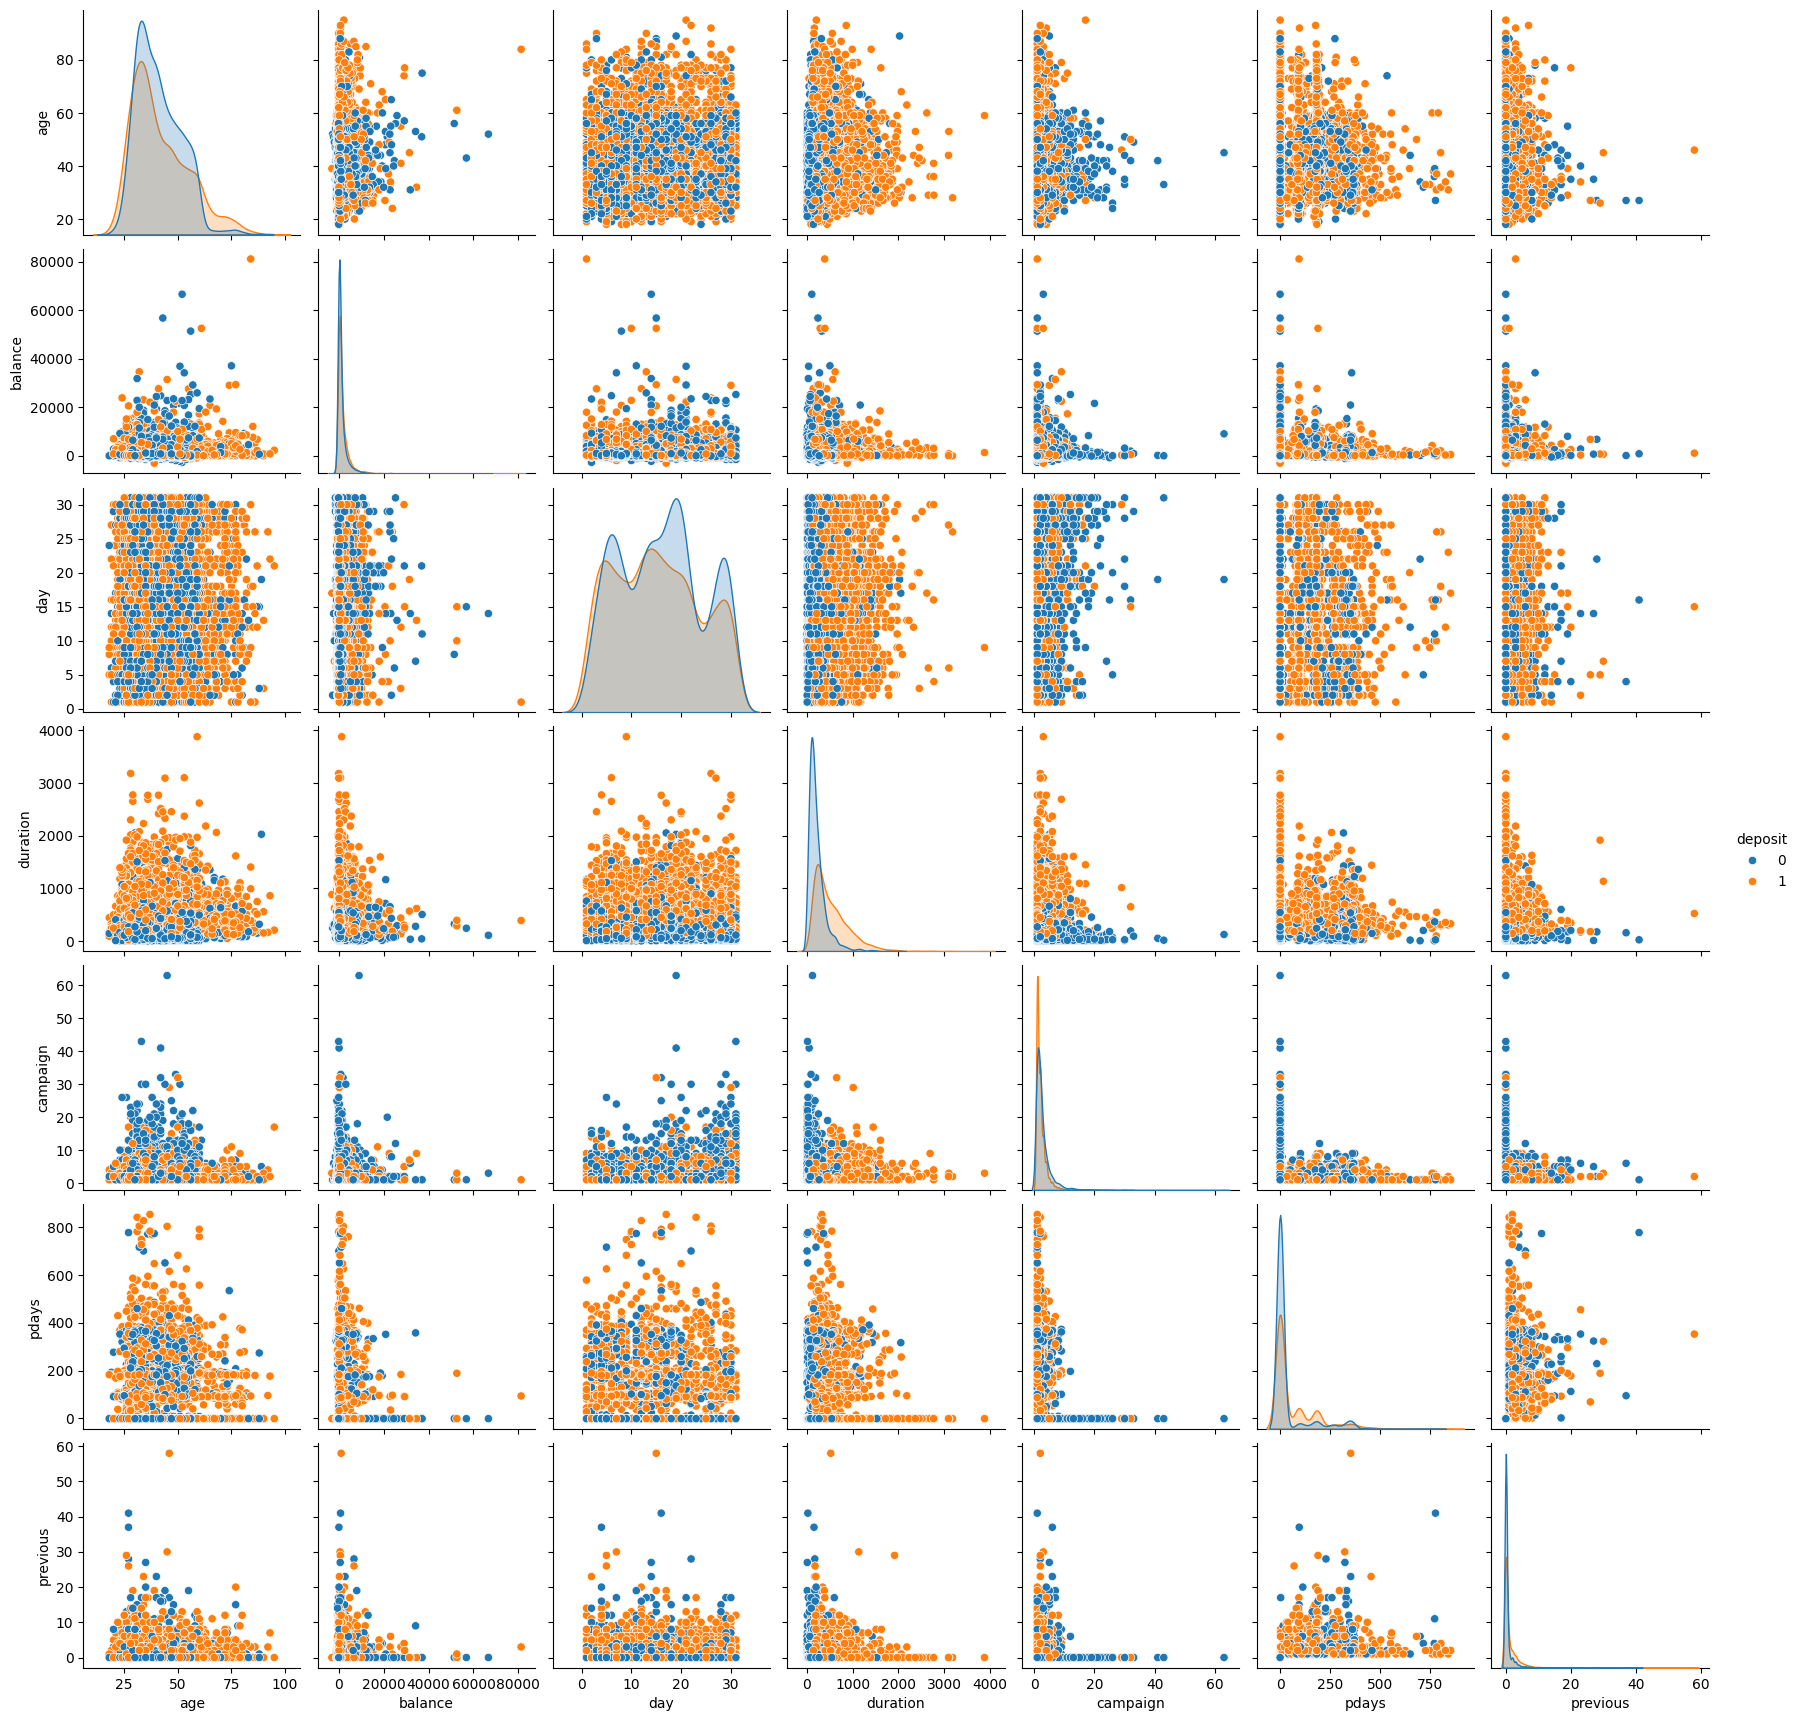

In [75]:
# Variables numericas vs target categórico
sns.pairplot(pd.concat([X_train, y_train], axis=1),
            kind='scatter',
            hue=target);

In [55]:
corr = np.abs(X_train[features_num].join(y_train).corr()[target]).sort_values(ascending=True)
print(corr)

bad_corr_feat = corr[corr < 0.1].index.values
print(bad_corr_feat)

X_train.drop(columns=bad_corr_feat, inplace=True)

age         0.031209
day         0.051525
balance     0.072000
campaign    0.126892
previous    0.141661
pdays       0.152436
duration    0.455134
deposit     1.000000
Name: deposit, dtype: float64
['age' 'day' 'balance']


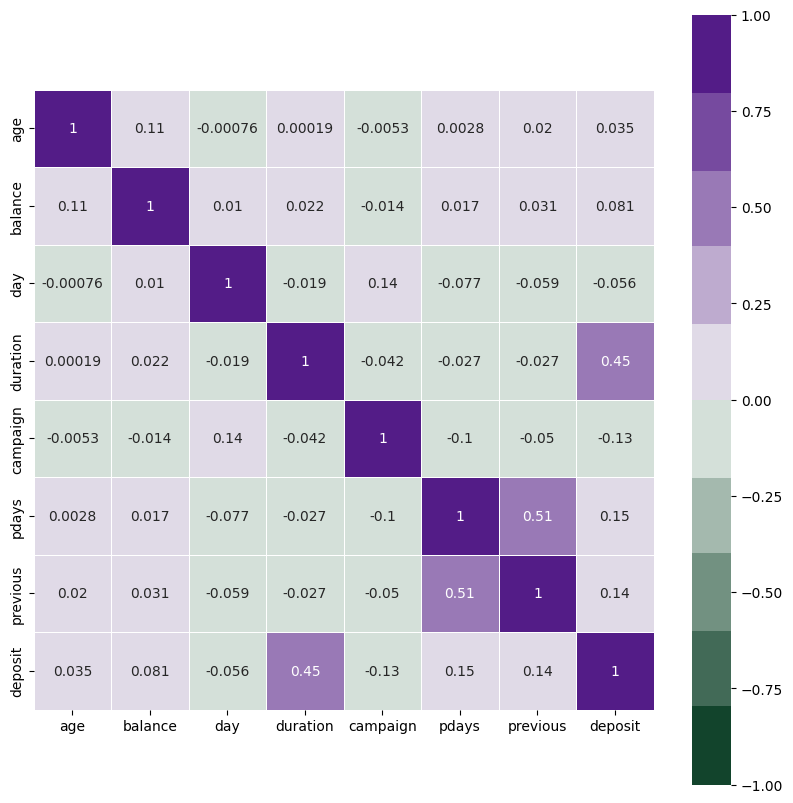

In [76]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(numeric_only=True),
            vmin=-1,
            vmax=1,
            center=0,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=10),
            square=True,
            annot=True,
            linewidths=.5);

### Ejercicio 5

Crea los pares X,y para train y test y escala los datos. ¿Por qué debemos hacerlo?

In [94]:
# Creo el scaler con los datos de train
scal = StandardScaler() # Declaro el scaler
scal.fit(X_train) # Lo "entreno". Calculo su media y std para cada feature
X_train_scaled = scal.transform(X_train) # Aplico el scaler y sobreescribo los datos de train
print(X_train_scaled[0])

# Aplico el mismo scaler con los datos de test
X_test_scaled = scal.transform(X_test)

[-1.11404081  1.34627101 -0.66666896  1.94194241  0.92180438  1.37403675
  0.99172215]


### Ejercicio 6

 Crea un modelo de regresión logistica y observa sus métricas. Además, registra su tiempo de entrenamiento y de predicciones

In [99]:

log_reg = LogisticRegression(max_iter=5000)
log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=5000)

In [103]:
print(log_reg.score(X_train, y_train))
print(log_reg.score(X_test, y_test))
y_pred = log_reg.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

0.7468921491768395
0.7357814599193909
              precision    recall  f1-score   support

           0       0.72      0.81      0.76      1166
           1       0.76      0.66      0.70      1067

    accuracy                           0.74      2233
   macro avg       0.74      0.73      0.73      2233
weighted avg       0.74      0.74      0.73      2233



### Ejercicio 7

Crea un modelo MLP, con sklearn, con dos hidden layers de 100 neuronas c/u y observa sus métricas. Además, registra su tiempo de entrenamiento y de predicciones

In [104]:
from sklearn.neural_network import MLPClassifier # Fijate que sklearn sí que 
# distingue entre clasificador y regresor. No tendremos que hacerlo nosotros.

mlp = MLPClassifier(hidden_layer_sizes=(100,100))

In [105]:
mlp.fit(X_train_scaled, y_train)

print(mlp.score(X_train_scaled, y_train))
print(mlp.score(X_test_scaled, y_test))

0.8402956658080412
0.787281683833408


c:\Users\josel\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [106]:
y_pred = mlp.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79      1166
           1       0.77      0.79      0.78      1067

    accuracy                           0.79      2233
   macro avg       0.79      0.79      0.79      2233
weighted avg       0.79      0.79      0.79      2233



### Ejercicio 8

Compara los dos modelos. En un caso real, ¿Con cuál modelo te quedarías? ¿Por qué?